In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv(r"C:\Users\abcde\Downloads\Ecommerce_data.csv")
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [4]:
df['label'].unique()

array(['Household', 'Electronics', 'Clothing & Accessories', 'Books'],
      dtype=object)

In [49]:
label_mapping = {'Household': 0, 'Electronics': 1, 'Clothing & Accessories': 2, 'Books': 3}

In [50]:
df['label_num'] = df['label'].map(label_mapping)
df.head(2)

,Text,label,label_num,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...


In [10]:
df['label'].value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [16]:
def preprocess(text):
    doc = nlp(text)
    filtered_text = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_text.append(token.lemma_)
    return " ".join(filtered_text)

In [17]:
df['preprocessed_text'] = df['Text'].apply(preprocess)
df.head(2)

,Text,label,label_num,preprocessed_text
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(df['preprocessed_text'], df['label_num'], random_state=42, stratify=df['label_num'], test_size=0.2) 

In [24]:
X_train.size

19200

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
clf = Pipeline([('vectorizer', TfidfVectorizer()), ('model', RandomForestClassifier())])
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', RandomForestClassifier())])

In [28]:
y_pred = clf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1200
           1       0.98      0.97      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



In [31]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1173,    5,   10,   12],
       [  24, 1164,    2,   10],
       [  10,    9, 1177,    4],
       [   8,    8,   11, 1173]])

Text(50.722222222222214, 0.5, 'Actual_values')

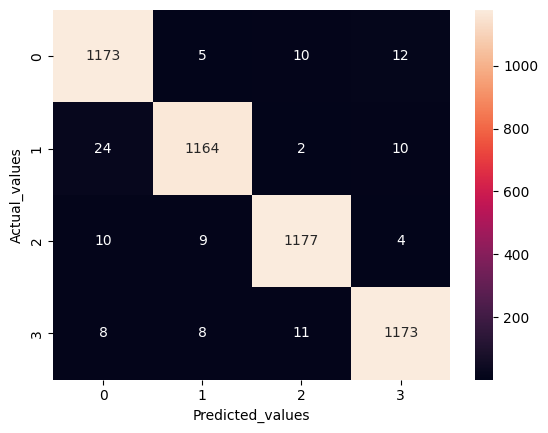

In [39]:
sn.heatmap(cm, annot=True, fmt='d')  # fmt='d' means annotations must be integer
plt.xlabel("Predicted_values")
plt.ylabel("Actual_values")

In [47]:
print(clf.predict(["hiii... this is a sports news.. best volleyball"]))

[3]


In [48]:
print(clf.predict(["this television is awesome. high hd"]))

[1]


In [51]:
import pickle
pickle_data = {
   "classifier": clf,
    "label_mapping": label_mapping
}
with open("Ecommerce_Classification.pkl", "wb") as file:
    pickle.dump(pickle_data, file)